### Initial data exploration


In [1]:
import numpy as np

from data.data_handler import data_handler
import matplotlib.pyplot as plt
from data.utils.data_downloader import DataDownloader

In [2]:
downloader = DataDownloader()
downloader.download_data()

INFO:DataDownloader:Data already downloaded


In [3]:
data_handler.list_data()

/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/20191223-ftp/new_metabric_tables/cell_neighbour_relationships.csv
/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/20191223-ftp/new_metabric_tables/cell_neighbour_relationships_dictionary.xlsx
/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/20191223-ftp/new_metabric_tables/single_cell_data.csv
/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/20191223-ftp/new_metabric_tables/single_cell_data_dictionary.xlsx
/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/20191223-ftp/.DS_Store
/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/20191223-ftp/new_metabric_tables
/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/METABRIC_IMC/to_public_repository/cell_masks/MB0653_1_63_cellmask.tiff
/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/METABRIC_IMC/to_public_repository/cell_masks/MB0442_1_375_cellmask.tiff
/Users/medinils/Desktop/IMC_Spatial_predi

In [4]:
cell_data = data_handler.get_dataframe_of('single_cell_data.csv')

In [5]:
cell_data.head()

file_id metabricId  core_id  ImageNumber  ObjectNumber  HH3_total  \
0  MB0000_1_527    MB-0000        1          527             1   1.058000   
1  MB0000_1_527    MB-0000        1          527             2   0.889243   
2  MB0000_1_527    MB-0000        1          527             3   0.861557   
3  MB0000_1_527    MB-0000        1          527             4   1.746239   
4  MB0000_1_527    MB-0000        1          527             5   0.979274   

       CK19    CK8_18     Twist      CD68  ...       DNA1       DNA2  \
0  0.000000  0.000000  0.000000  0.618000  ...  17.330166  17.718166   
1  0.166252  0.166487  0.109148  0.071443  ...  28.806173  52.767433   
2  0.150873  0.099861  0.064506  0.025316  ...  17.687202  29.113506   
3  0.069159  0.043478  0.021739  0.623623  ...  29.021986  54.447716   
4  0.144429  0.125500  0.067714  0.028940  ...  21.988190  43.471428   

   H3K27me3       CK5  Fibronectin  Location_Center_X  Location_Center_Y  \
0  0.903333  0.344000    35.934502          161.83333           6.000000   
1  0.781896  0.111391    16.294783          177.30435          15.539130   
2  0.872304  0.542215    16.348177          293.51898          19.886076   
3  0.664442  0.172638     9.053551          165.04347          22.210144   
4  0.446310  0.057833     9.991821          108.88095          28.523809   

   SOM_nodes  pg_cluster        description  
0          6          24        Fibroblasts  
1          6          24        Fibroblasts  
2          6          24        Fibroblasts  
3          4          20  Fibroblasts CD68+  
4          6          24        Fibroblasts  

[5 rows x 49 columns]

In [7]:
# Number of unique files and count
unique_file_id = cell_data['file_id'].unique()
#print(f'Number of unique file ids: {unique_file_id}')

id_count = cell_data['file_id'].value_counts()
len(id_count)

# Object number tell us the the number of cells in each image
cell_data['description'].value_counts()


description
HR+ CK7-                    129830
Myofibroblasts               65167
Fibroblasts                  57590
HR- CK7-                     40464
HR- CK7+                     31912
HRlow CKlow                  26209
T cells                      22340
HR+ CK7- Ki67+               18798
Fibroblasts CD68+            15729
HR- Ki67+                    14185
HR+ CK7- Slug+                8584
Macrophages Vim+ Slug-        7593
Hypoxia                       6745
Myoepithelial                 5015
HER2+                         4703
Macrophages Vim+ Slug+        4086
Macrophages Vim+ CD45low      3995
Endothelial                   3846
B cells                       3685
Basal CKlow                   3583
Vascular SMA+                 3332
HR- CKlow CK5+                2453
Name: count, dtype: int64

In [8]:
from PIL import Image

im_cellmask = Image.open('/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/METABRIC_IMC/to_public_repository/cell_masks/MB0000_1_527_cellmask.tiff')
#im_cellmask

im_cellmask_array = np.array(im_cellmask)
im_cellmask_array


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [10]:
# clinical data
import pandas as pd
clinical_data =pd.read_csv("/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/METABRIC_IMC/metabric_clinical_data.tsv", sep='\t')
clinical_data.head()

Study ID Patient ID Sample ID  Age at Diagnosis  \
0  brca_metabric    MB-0000   MB-0000             75.65   
1  brca_metabric    MB-0002   MB-0002             43.19   
2  brca_metabric    MB-0005   MB-0005             48.87   
3  brca_metabric    MB-0006   MB-0006             47.68   
4  brca_metabric    MB-0008   MB-0008             76.97   

  Type of Breast Surgery    Cancer Type  \
0             MASTECTOMY  Breast Cancer   
1      BREAST CONSERVING  Breast Cancer   
2             MASTECTOMY  Breast Cancer   
3             MASTECTOMY  Breast Cancer   
4             MASTECTOMY  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           NO   
1           Breast Invasive Ductal Carcinoma        High           NO   
2           Breast Invasive Ductal Carcinoma        High          YES   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          YES   
4  Breast Mixed Ductal and Lobular Carcinoma        High          YES   

  Pam50 + Claudin-low subtype  ...  Relapse Free Status (Months)  \
0                 claudin-low  ...                        138.65   
1                        LumA  ...                         83.52   
2                        LumB  ...                        151.28   
3                        LumB  ...                        162.76   
4                        LumB  ...                         18.55   

  Relapse Free Status Number of Samples Per Patient  Sample Type     Sex  \
0      0:Not Recurred                             1      Primary  Female   
1      0:Not Recurred                             1      Primary  Female   
2          1:Recurred                             1      Primary  Female   
3      0:Not Recurred                             1      Primary  Female   
4          1:Recurred                             1      Primary  Female   

  3-Gene classifier subtype TMB (nonsynonymous) Tumor Size Tumor Stage  \
0                 ER-/HER2-            0.000000       22.0         2.0   
1     ER+/HER2- High Prolif            2.615035       10.0         1.0   
2                       NaN            2.615035       15.0         2.0   
3                       NaN            1.307518       25.0         2.0   
4     ER+/HER2- High Prolif            2.615035       40.0         2.0   

  Patient's Vital Status  
0                 Living  
1                 Living  
2        Died of Disease  
3                 Living  
4        Died of Disease  

[5 rows x 39 columns]

In [71]:
import pandas as pd
# Read neighboring data
neighbour_data = pd.read_csv('/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/20191223-ftp/new_metabric_tables/cell_neighbour_relationships.csv')

grouped_cell_data = cell_data.groupby('file_id')
grouped_cell_data.head()

# Create empty graph 
graphs = {}
for file_id, group in grouped_cell_data:
    # initialize graph
    G = nx.Graph()
    # add nodes and edges
    for index, row in group.iterrows():
        # add nodes
        G.add_node(row['ObjectNumber'], CD68 = row['CD68'], CD3 = row['CD3'], CD20 = row['CD20'])
        # add edges
        # fist node
        coor = (row['Location_Center_X'], row['Location_Center_Y'])
        for index2, row2 in group.iterrows():
            coor2 = (row2['Location_Center_X'], row2['Location_Center_Y'])
            distance = np.linalg.norm(np.array(coor) - np.array(coor2))
            if distance < 50:
                G.add_edge(row['ObjectNumber'], row2['ObjectNumber'], weight = distance)
    # save G in graphs
    graphs[file_id] = G
        

    

KeyboardInterrupt: 

In [ ]:
# Assuming 'G' is your graph object
nx.write_graphml(G, '/mnt/data/graph.graphml')


In [65]:
grouped_cell_data.head()

file_id metabricId  core_id  ImageNumber  ObjectNumber  \
0       MB0000_1_527    MB-0000        1          527             1   
1       MB0000_1_527    MB-0000        1          527             2   
2       MB0000_1_527    MB-0000        1          527             3   
3       MB0000_1_527    MB-0000        1          527             4   
4       MB0000_1_527    MB-0000        1          527             5   
...              ...        ...      ...          ...           ...   
477783  MB0921_1_381    MB-0921        1          381             1   
477784  MB0921_1_381    MB-0921        1          381             3   
477785  MB0921_1_381    MB-0921        1          381             4   
477786  MB0921_1_381    MB-0921        1          381             5   
477787  MB0921_1_381    MB-0921        1          381             6   

        HH3_total      CK19    CK8_18     Twist      CD68  ...       DNA1  \
0        1.058000  0.000000  0.000000  0.000000  0.618000  ...  17.330166   
1        0.889243  0.166252  0.166487  0.109148  0.071443  ...  28.806173   
2        0.861557  0.150873  0.099861  0.064506  0.025316  ...  17.687202   
3        1.746239  0.069159  0.043478  0.021739  0.623623  ...  29.021986   
4        0.979274  0.144429  0.125500  0.067714  0.028940  ...  21.988190   
...           ...       ...       ...       ...       ...  ...        ...   
477783   4.350025  0.107950  0.148375  0.282800  0.254950  ...  33.014149   
477784   3.379511  0.206611  0.181389  0.183333  0.040267  ...  45.112843   
477785   6.561526  0.454372  2.246077  0.384372  0.098295  ...  35.654781   
477786  10.550648  1.237463  5.416111  0.601704  0.056815  ...  59.725666   
477787   1.427982  0.109044  0.101363  0.132796  0.063646  ...  38.548256   

              DNA2  H3K27me3       CK5  Fibronectin  Location_Center_X  \
0        17.718166  0.903333  0.344000    35.934502          161.83333   
1        52.767433  0.781896  0.111391    16.294783          177.30435   
2        29.113506  0.872304  0.542215    16.348177          293.51898   
3        54.447716  0.664442  0.172638     9.053551          165.04347   
4        43.471428  0.446310  0.057833     9.991821          108.88095   
...            ...       ...       ...          ...                ...   
477783   63.240250  0.402575  0.533825     1.589800           85.37500   
477784   83.481636  1.002067  0.990544    11.668344          431.41110   
477785   67.929092  0.611628  0.313179     0.938795          308.97437   
477786  112.601810  0.965463  0.383963     0.918389          338.92593   
477787   69.927315  0.451531  0.251637     7.547708          390.70798   

        Location_Center_Y  SOM_nodes  pg_cluster        description  
0                6.000000          6          24        Fibroblasts  
1               15.539130          6          24        Fibroblasts  
2               19.886076          6          24        Fibroblasts  
3               22.210144          4          20  Fibroblasts CD68+  
4               28.523809          6          24        Fibroblasts  
...                   ...        ...         ...                ...  
477783           2.525000         38          43     Myofibroblasts  
477784           3.811111         84          45        HRlow CKlow  
477785           5.974359        201          48           HR+ CK7-  
477786           2.629630        201          48           HR+ CK7-  
477787           4.300885         20          21        Fibroblasts  

[2740 rows x 49 columns]

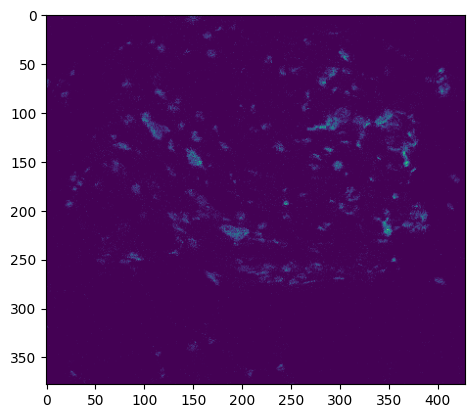

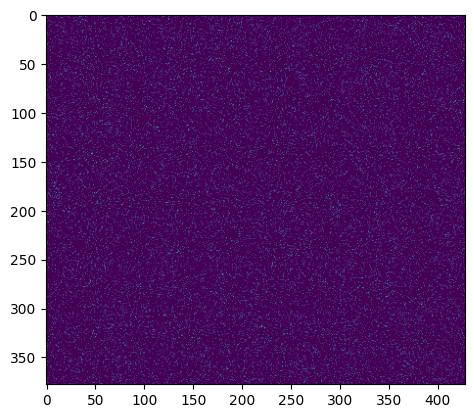

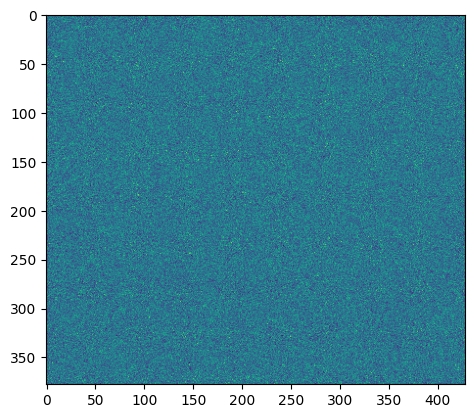

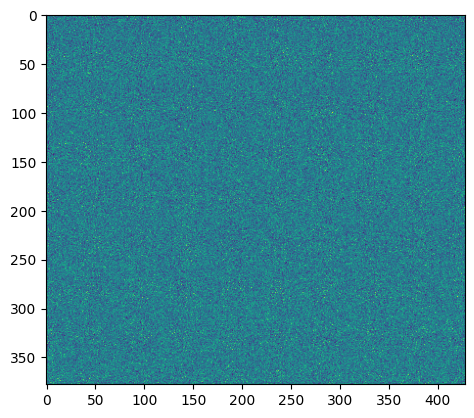

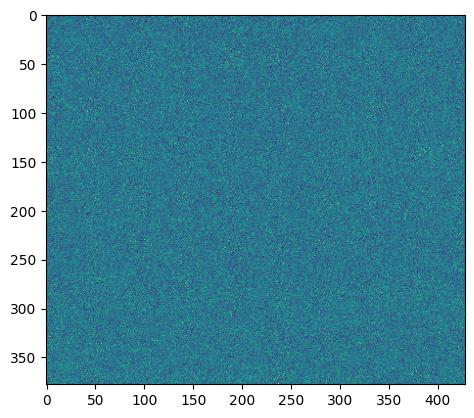

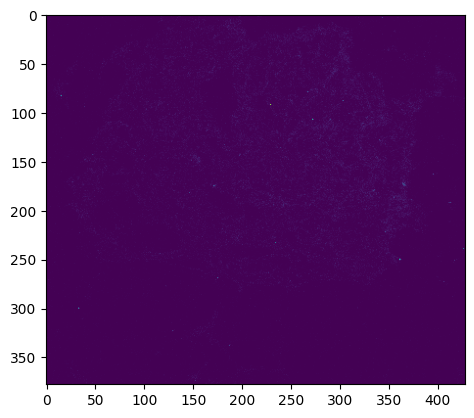

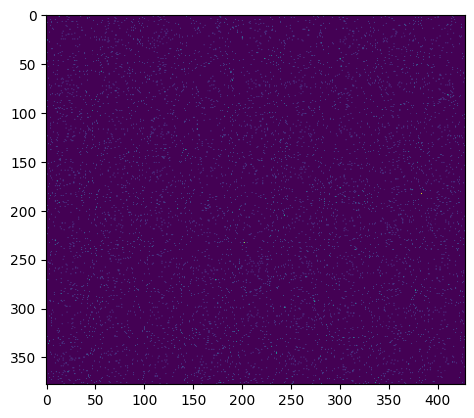

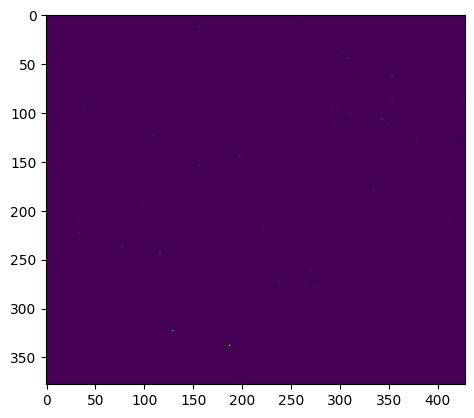

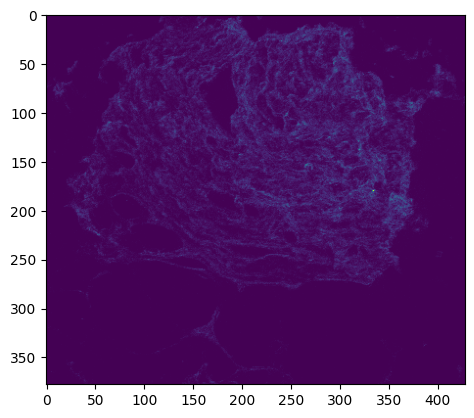

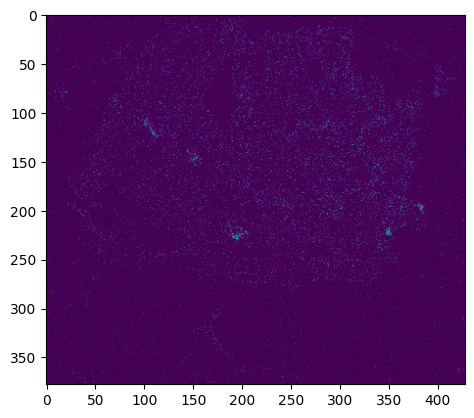

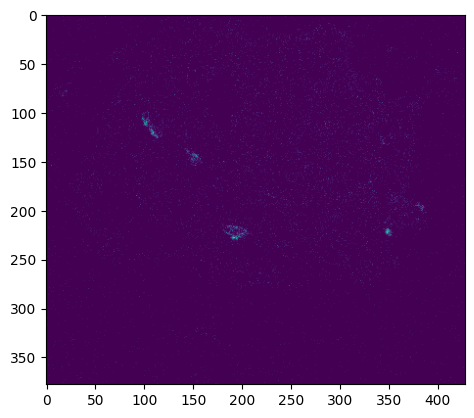

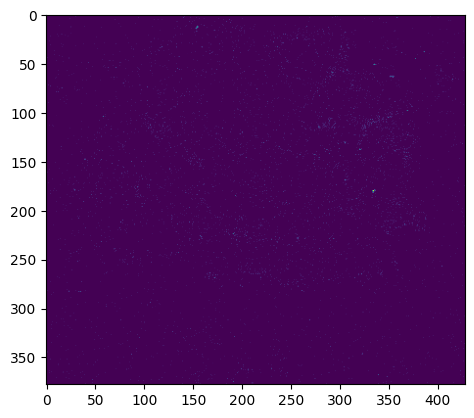

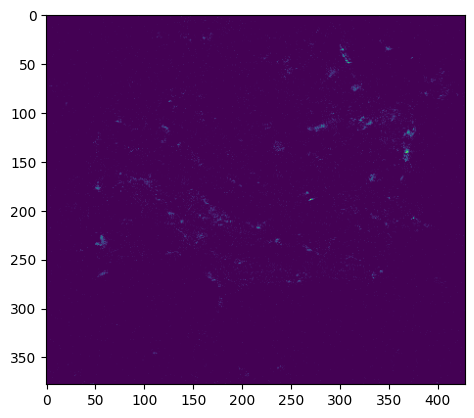

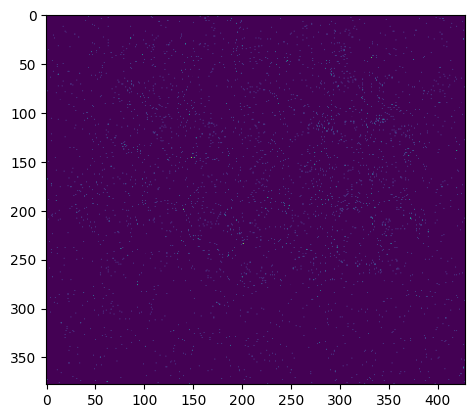

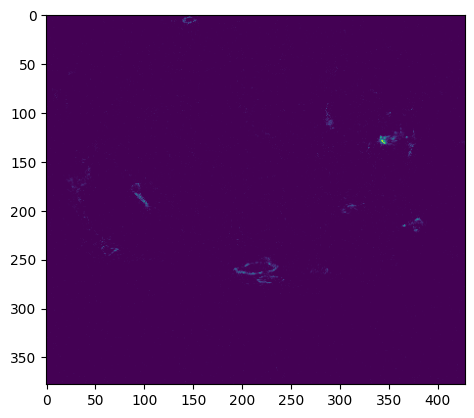

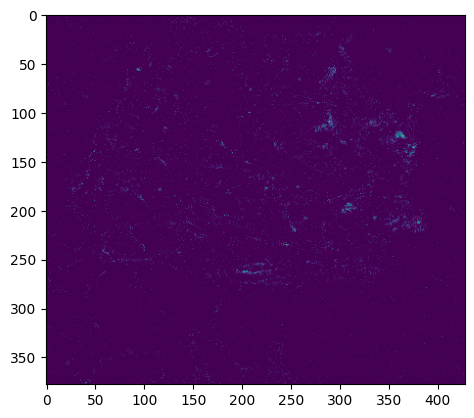

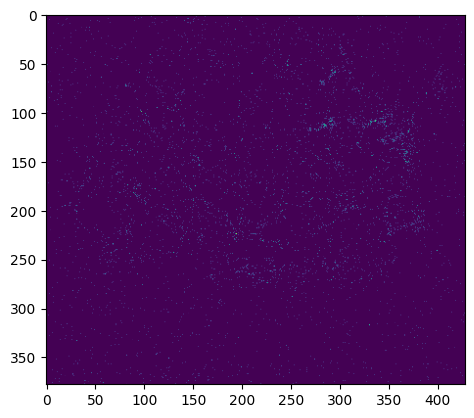

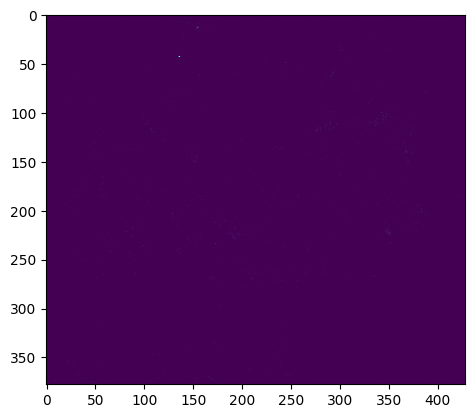

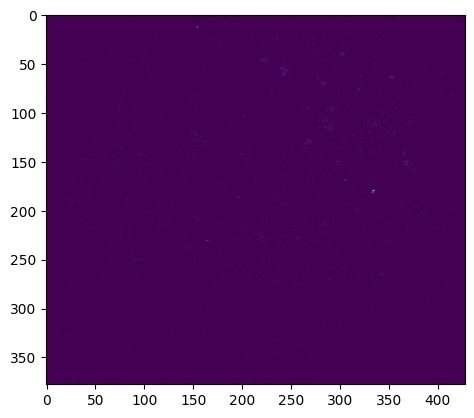

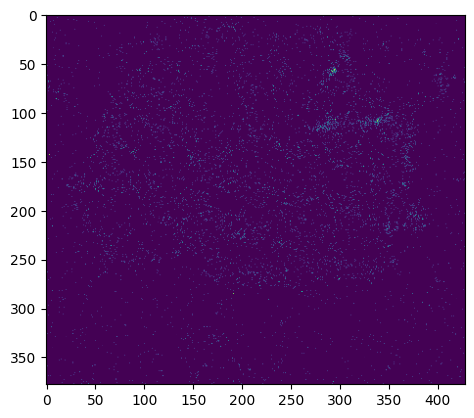

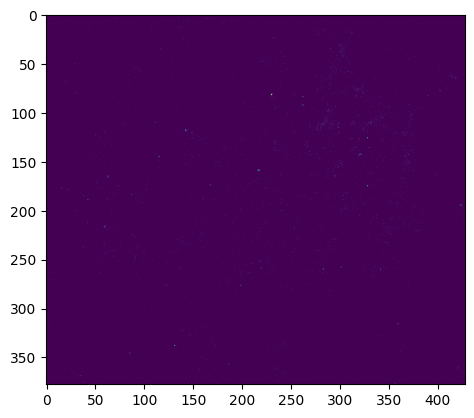

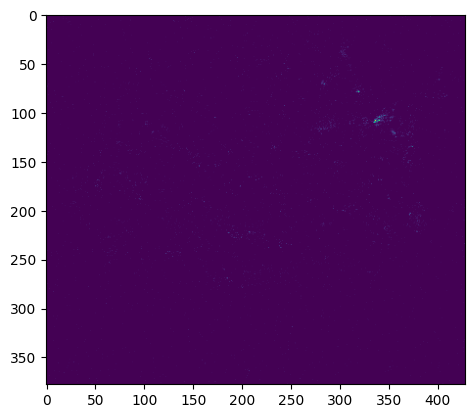

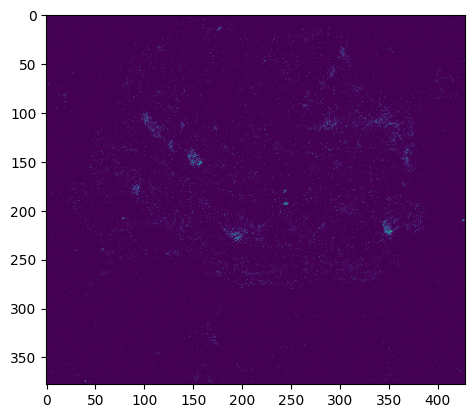

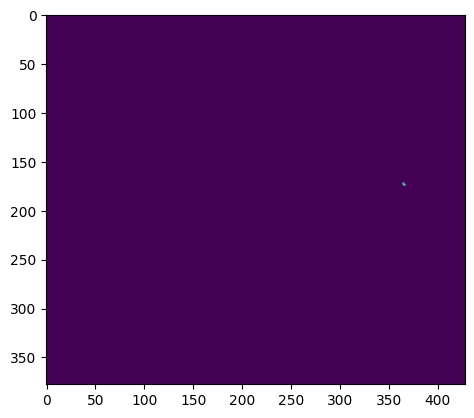

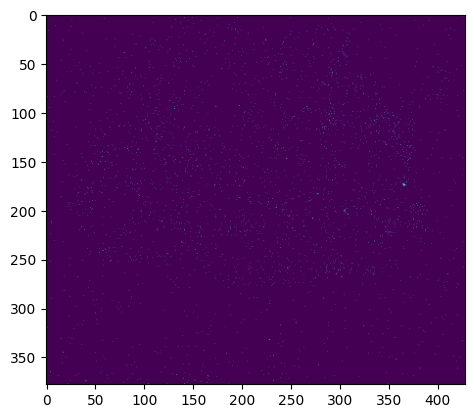

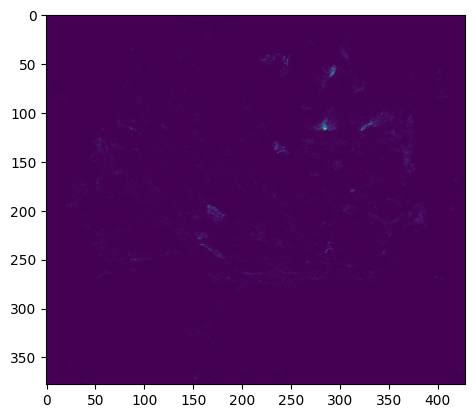

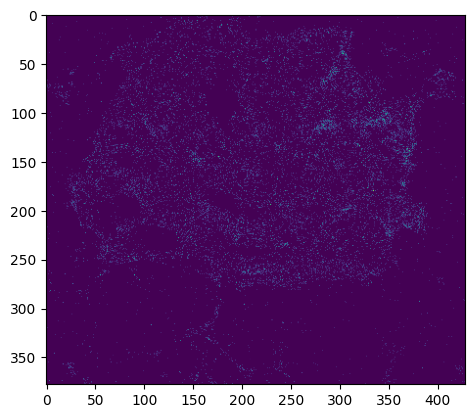

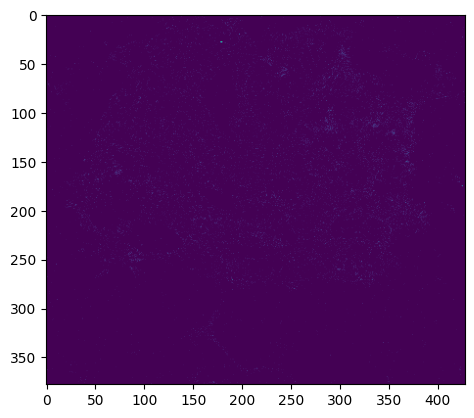

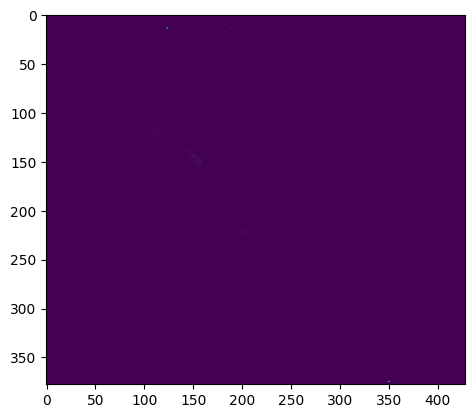

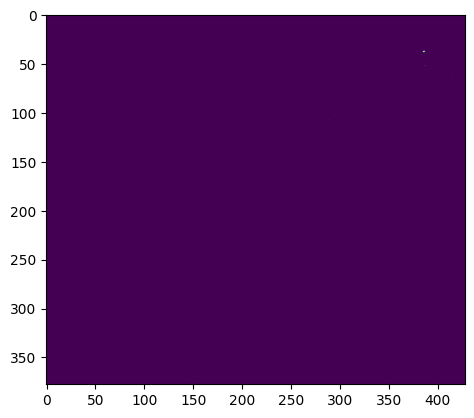

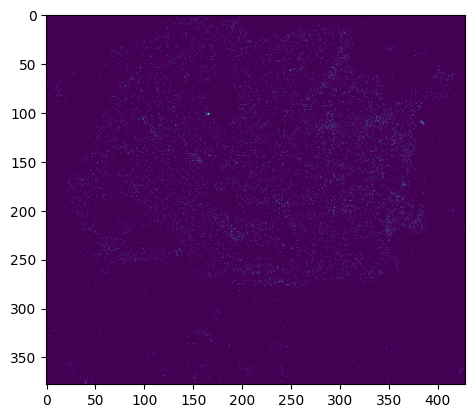

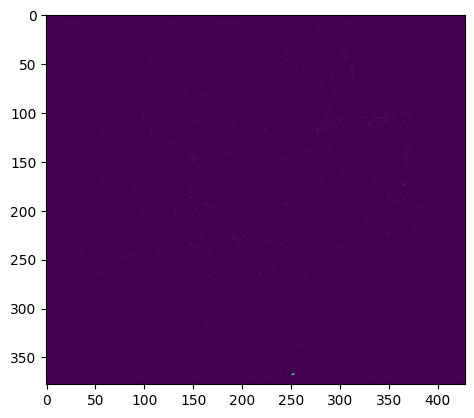

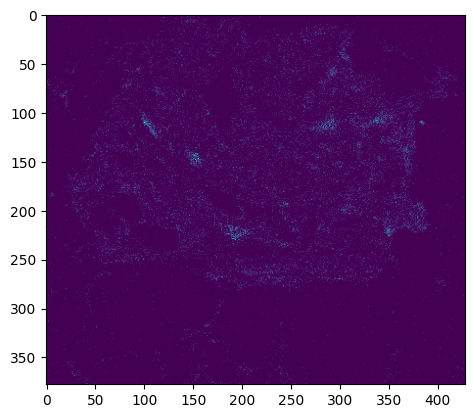

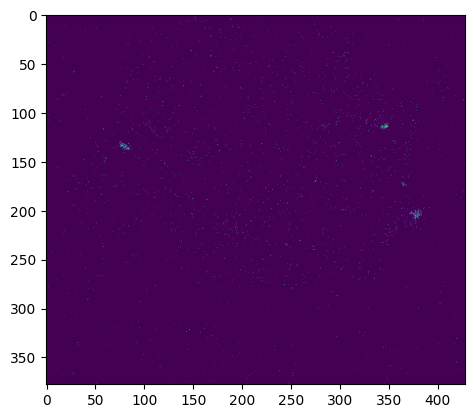

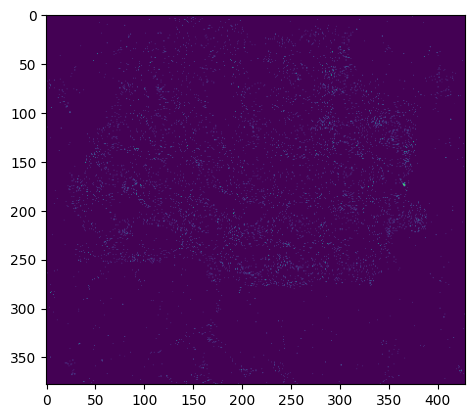

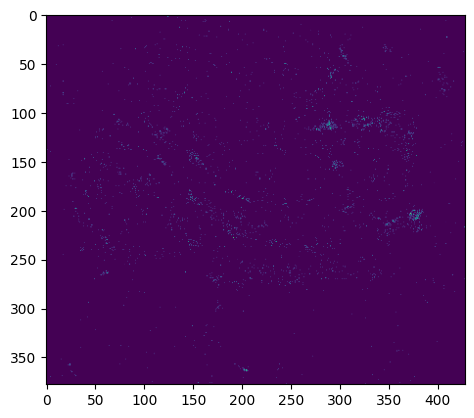

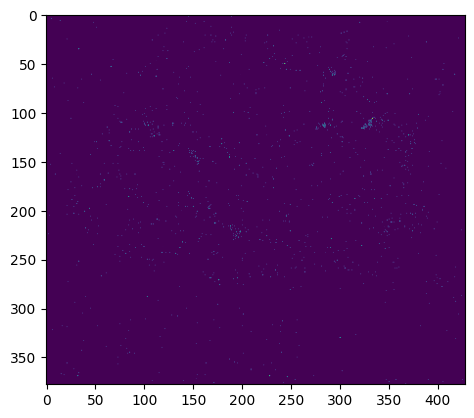

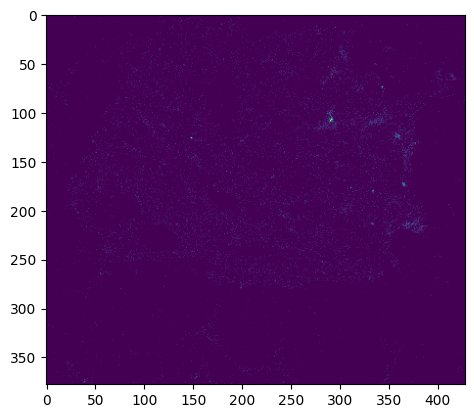

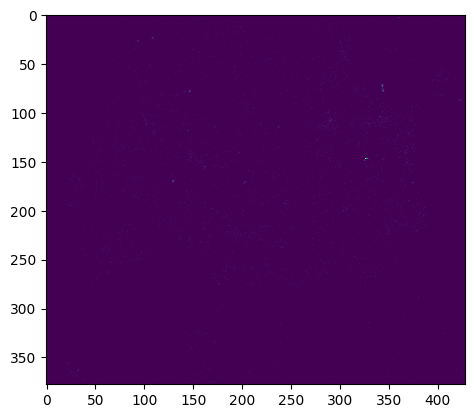

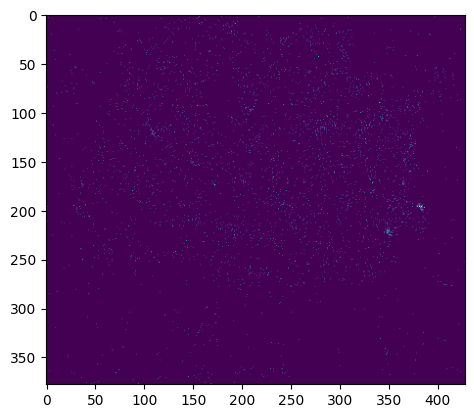

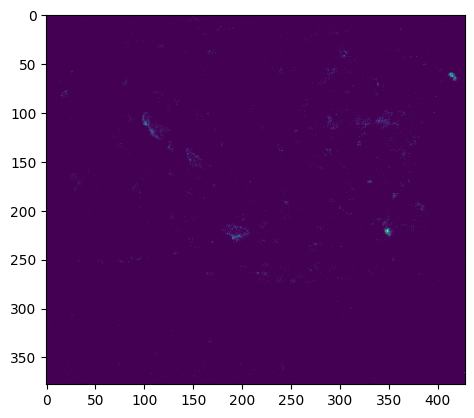

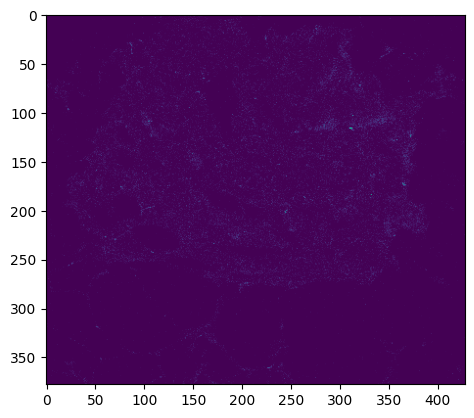

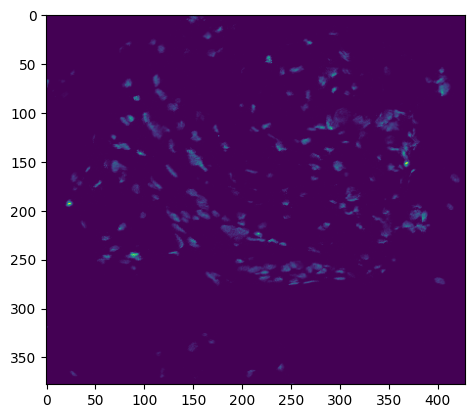

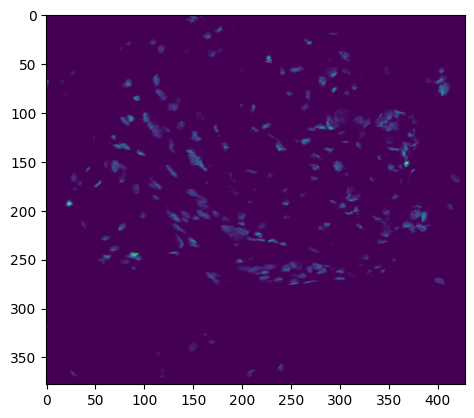

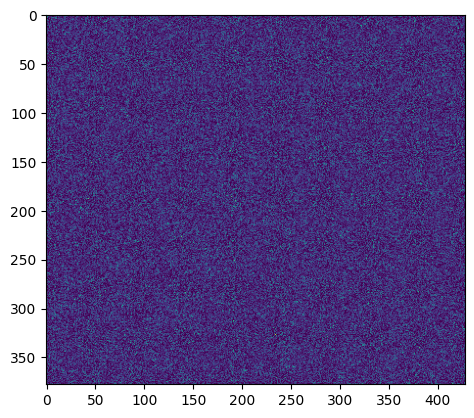

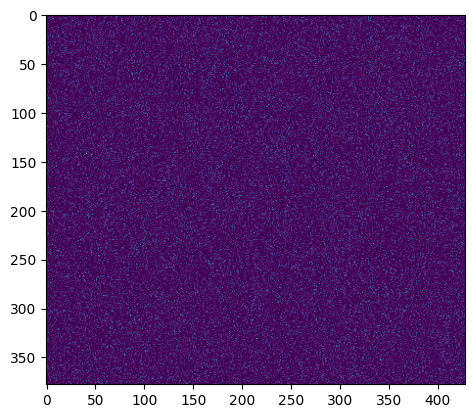

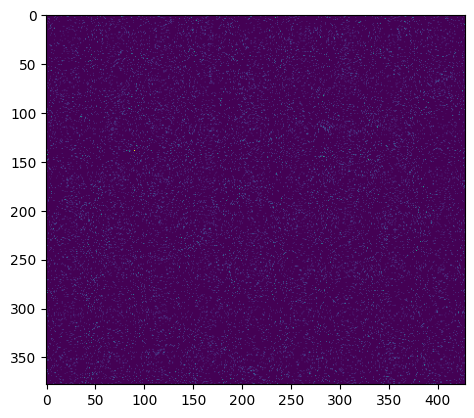

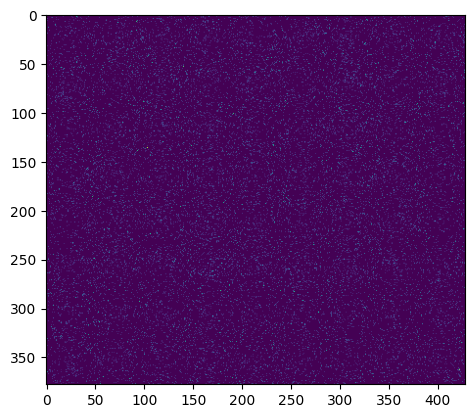

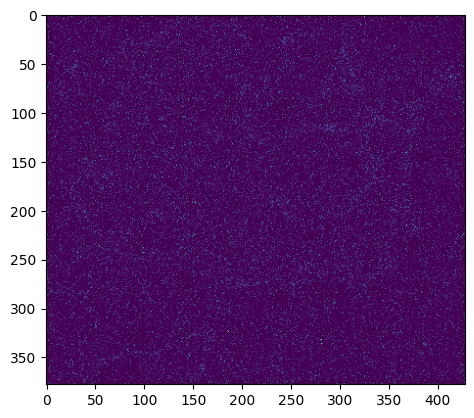

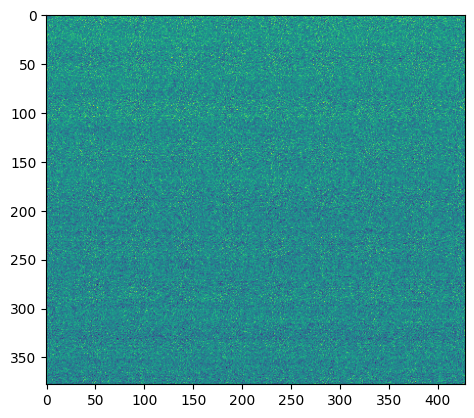

In [18]:
for i in image:
    plt.imshow(i)
    plt.show()